
# Project DAT121 Facebook Data

# Group 1 

Ashesh Raj Gnawali,
Ghazal Azadi,
Martin Bø

##  Introduction 
Facebook is a social networking service company, based in the USA which was founded in Feb 4,2004. It offers online social media services that help build up social-relationship with other people who have similar interests. All devices that have internet connectivity like smartphones and personal computers can easily access the services of Facebook. 

Our project is associated with Facebook, as it consists of data from 10 Thai fashion and cosmetic retail seller’s Facebook pages. These fashion houses use the social media platform of Facebook to advertise their products. The advertisements are basically based on four contents namely videos, photos, statuses and links.  The engagement metrices consist of reactions, comment and shares.

##  Methods
We have used Python for data analysis with Jupyter Notebook , and its libraries for data visualization and manipulation. The libraries used for the data analysis are NumPy and Pandas whereas the data visualization tools used are Matplotlib and Seaborn. We have also analysed data using General Lineralized Models(GLM) using Scipy library. 

As the data of links and statuses comprised a very small proportion in our dataset, we agreed upon analyzing just the photos and video contents which covers of about 94% of our data. 

## Research

In this project we tried to answer the following questions with brief analysis of data:

1. What is the suitable time (month/day of the week/ hour) for these Facebook pages to put a Facebook post such that it reaches maximum number of audiences in terms of reactions, comments and shares?
1. Are photo contents or video contents more effective?
1. What is the most suitable time (month/day of the week/ hour) for these Facebook pages to put a Facebook post (only videos and photos) analyzed individually such that it reaches maximum number of audiences in terms of reactions, comments and shares?
2. Facebook live was introduced in August of 2015 which introduced the new era of reactions(sad,haha,love,angry). With this, what is the current scenario with the usage of likes in video and photo as compared to the reactions?

## Discussions and Findings
The findings and discussions are commented just below the graphs and plots. 


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')



In [2]:
plt.rcParams['figure.figsize']=(15,9)

## Descriptive analysis of the dataset

In [3]:
df= pd.read_csv("Live.csv")

In [4]:
#Removal of duplicate datas
df.drop_duplicates(inplace=True)
df.shape

(6999, 12)

In [5]:
df.head(5)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


The table above shows our raw dataset. The first coloumn contains the type of status which was posted. This contains either "Video", "Photo", "Link" or "status". The second column contains the date and time of publication, while the next 9 coloumns contains different types of facebook interactions such as reactions, comments and shares. 

In [6]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000
mean,224.994571,225.552079,40.258608,209.946707,12.751536,1.252893,0.697957,0.232605,0.110159
std,452.880746,892.743010,132.046903,439.550330,40.106872,8.725551,3.970912,1.481105,0.688582
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,58.000000,4.000000,0.000000,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,216.000000,22.000000,4.000000,182.000000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


From the table above, number of observations, mean, standard deviation, min and max values as well as quantiles are shown. Most noteworthy is the mean, which shows the average amount of likes, comments, shares etc on a facebook post in our dataset.

In [7]:
#The status_id column is no longer required
df.drop('status_id', axis=1, inplace=True)

In [8]:
df['status_published'].dtype

dtype('O')

In [9]:
#Conversion of string data type of status_published into datetime
df['status_published'] = pd.to_datetime(df['status_published'])


In [10]:
df['status_published'].dtype

dtype('<M8[ns]')

In [11]:
#Deriving year,month and weekday from the status_published column
# 0 is Monday and 7 is Sunday

df['Year']= df['status_published'].dt.year
df['Month']= df['status_published'].dt.month
df['Day']= df['status_published'].dt.dayofweek 
df['Hour']=df['status_published'].dt.hour



In [12]:
# A list of the types of facebook interaction. Reactions contains "Love", "haha" etc while num_comments and num_shares contains the number of comments 
# and shares respectively on an individual post 

reaction = ['num_reactions', 'num_comments', 'num_shares']

In [13]:
status_type = df['status_type'].value_counts()
print(status_type)

photo     4244
video     2333
status     359
link        63
Name: status_type, dtype: int64


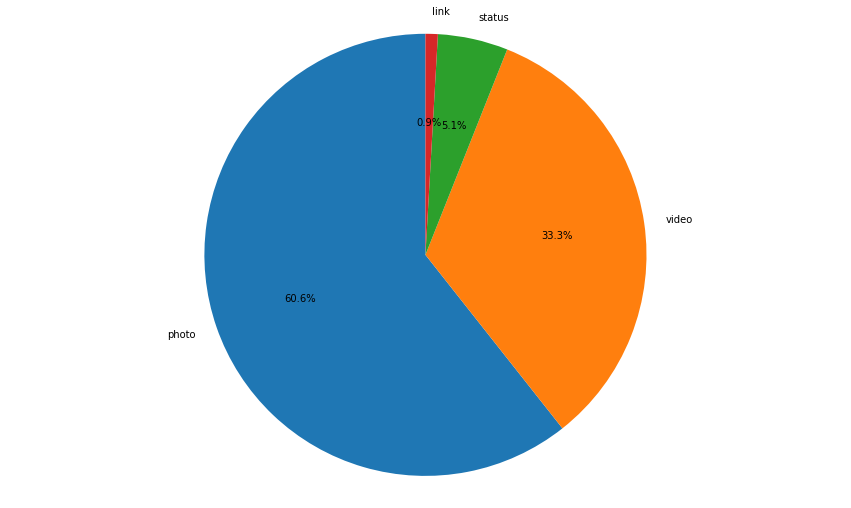

In [14]:
labels = [ "photo", "video","status","link"]
sizes = [status_type["photo"],status_type["video"], status_type["status"],status_type["link"]]
fig1, ax1 = plt.subplots()
fig1.figsize = (15,15)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.show()

The plot above shows a pie chart over the amount of different posts in our dataset. 60.6% of our data is photos, while 33.3% of the data is videos. 

In [15]:
new_df = df.drop(["num_likes","num_loves","num_wows","num_hahas","num_sads","num_angrys","status_published"],axis=1)
new_df.head(5) #Creates a new dataFrame that excludes number of likes, loves etc since these are features introduced in 2015, while our data set dates
# back further. However, these removed variables will be captured in the "num_reactions" coloumns, as this displays the sum of all the types of reactions
# such as "love", "Haha", "sad", "Angry" etc

,status_type,num_reactions,num_comments,num_shares,Year,Month,Day,Hour
0,video,529,512,262,2018,4,6,6
1,photo,150,0,0,2018,4,5,22
2,video,227,236,57,2018,4,5,6
3,photo,111,0,0,2018,4,5,2
4,photo,213,0,0,2018,4,2,3


This new dataframe contains the data that we will use from now on in our analysis. The status_published coloumn has been split into seperate columns for "Year", "Month", "Day" and "Hour" as this simplifies the prosess of analysing posts at different times.

In [16]:
#Calculation of percentage of shares of shares,comments and reactions in our dataset
percentage_reactions=(new_df["num_reactions"].sum())/(new_df["num_reactions"].sum()+new_df["num_comments"].sum()+new_df["num_shares"].sum())
percentage_comments=(new_df["num_comments"].sum())/(new_df["num_reactions"].sum()+new_df["num_comments"].sum()+new_df["num_shares"].sum())
percentage_shares=(new_df["num_shares"].sum())/(new_df["num_reactions"].sum()+new_df["num_comments"].sum()+new_df["num_shares"].sum())

(-1.1254589101710806,
 1.1268903846735754,
 -1.130328342604504,
 1.1014442110091216)

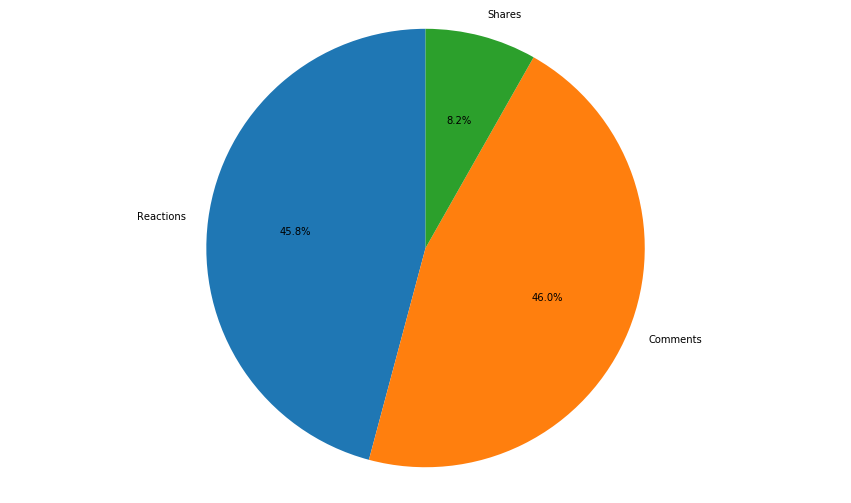

In [17]:
labels = [ "Reactions", "Comments","Shares"]
sizes = [percentage_reactions,percentage_comments,percentage_shares]
fig1, ax1 = plt.subplots()
fig1.figsize = (15,15)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')

The pie chart shows that the 45.8% of our data contains reactions, comments comprise of 46% whereas shares stand low at 8.2%.

In [18]:
status_type_reaction = new_df.drop(["Year","Month","Day","Hour"],axis=1)
status_type_reaction.groupby('status_type').mean()


,num_reactions,num_comments,num_shares
status_type,,,
link,370.142857,5.698413,4.396825
photo,172.330820,15.475495,2.491517
status,442.740947,36.428969,2.576602
video,283.369910,642.744964,115.728247


In [19]:
desc_stat = new_df[reaction].describe()
print(desc_stat)

       num_reactions  num_comments   num_shares
count    6999.000000   6999.000000  6999.000000
mean      224.994571    225.552079    40.258608
std       452.880746    892.743010   132.046903
min         0.000000      0.000000     0.000000
25%        17.000000      0.000000     0.000000
50%        58.000000      4.000000     0.000000
75%       216.000000     22.000000     4.000000
max      4710.000000  20990.000000  3424.000000


From the table above we can see that the average number of reactions to a post in our dataset is almost 225, while the number of comments is almost identical at 225,55. The number of shares is significantly lower at around 40 shares per post. 

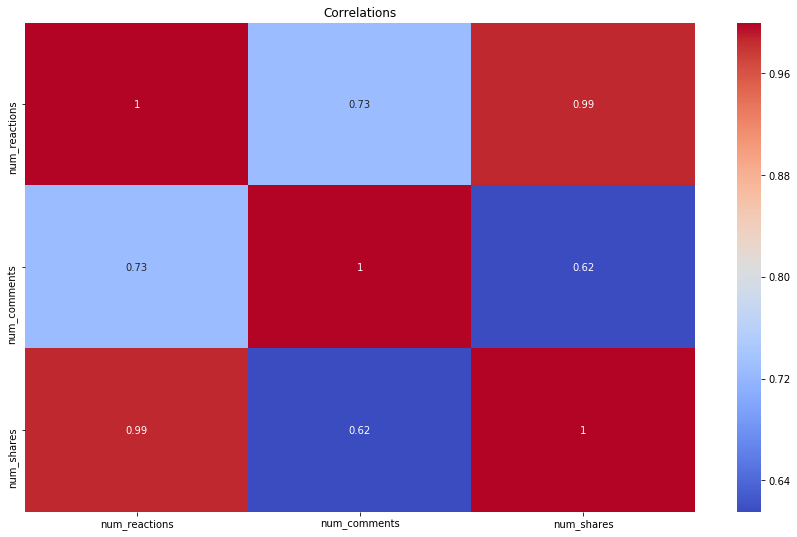

In [20]:
corr = desc_stat.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm");
plt.title("Correlations");

From the correlation matrix above, one can see that the number of shares seems highly correlated to the number of reactions at 99%. This implies that whenever someone shares a post they will react to it as well . There is also a fairly high correlation between the number of reactions and the number of comments at 73%, while the correlation between comments and shares are lower at 62%.

      num_reactions  num_comments  num_shares  Month   Day   Hour
Year                                                             
2012          12389          4053         110   5112  1830   4649
2013          45524          3018         513   3167  1535   4175
2014         141631          4623         841    885   764   2043
2015         519039         11359        2936   2315  1029   2989
2016         105220         61065        4105   3923  1788   4851
2017         259280        731519       90793  21535  6648  16542
2018         491654        763002      182472   9218  7495  19567


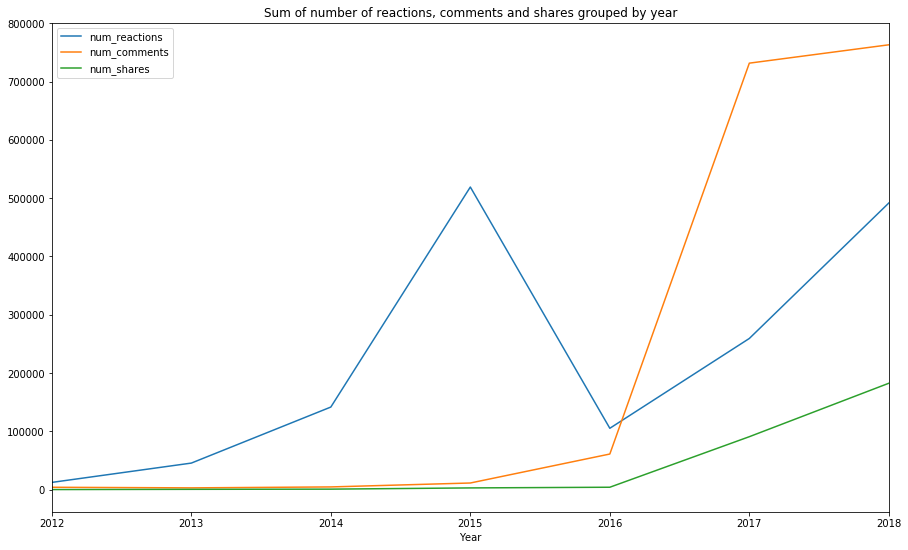

In [21]:
plot_df = new_df.groupby("Year").sum()
print(plot_df)
plot_df[reaction].plot()
plt.title("Sum of number of reactions, comments and shares grouped by year");

The plot above shows the developement of reactions, comments and shares over time from 2012 to 2018. We can see a steady increase in the number of shares and comments, while the number of reactions has an extreme spike in 2015, the same year as Facebook Live was introduced. As this spike seems very odd, we will investigate the reason behind this in histograms below.

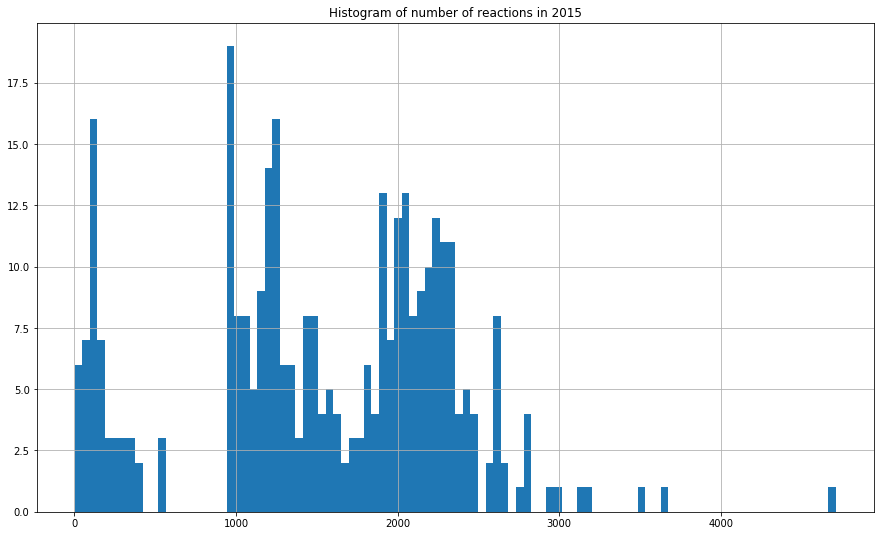

In [22]:
new_df[new_df.Year == 2015].num_reactions.hist(bins=100);
plt.title("Histogram of number of reactions in 2015");

The histogram above shows the distribution of reactions for posts in 2015. We can see a high number of posts with between 1000 and 2000 reacions, peaking at around 18 posts within the sub-1000 bin. 

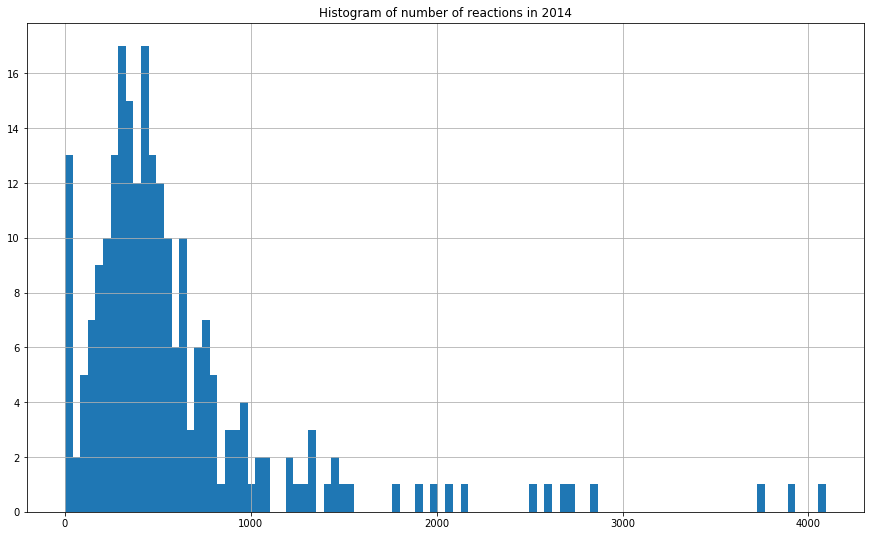

In [23]:
new_df[new_df.Year == 2014].num_reactions.hist(bins=100)
plt.title("Histogram of number of reactions in 2014");

The histogram for 2014 shows a distribution closer to a bell curve, where most of the posts are within the range of 0-1000 reactions. This is the reason why the spike in 2015 was observed earlier, as it has a significantly higher number of reactions within the 1000-2000 range.

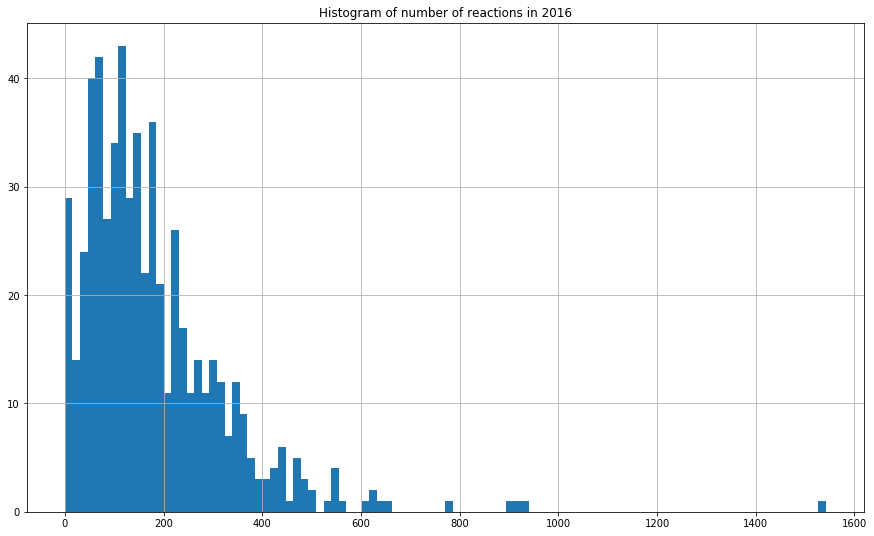

In [24]:
new_df[new_df.Year == 2016].num_reactions.hist(bins=100)
plt.title("Histogram of number of reactions in 2016");

The distribution of reactions in 2016 seems much more similar to 2014 than 2015. Here the number of reactions mostly range from 0 to 600 reactions, while in 2015 the majority of the reactions were in the range of 1000 to 2000.

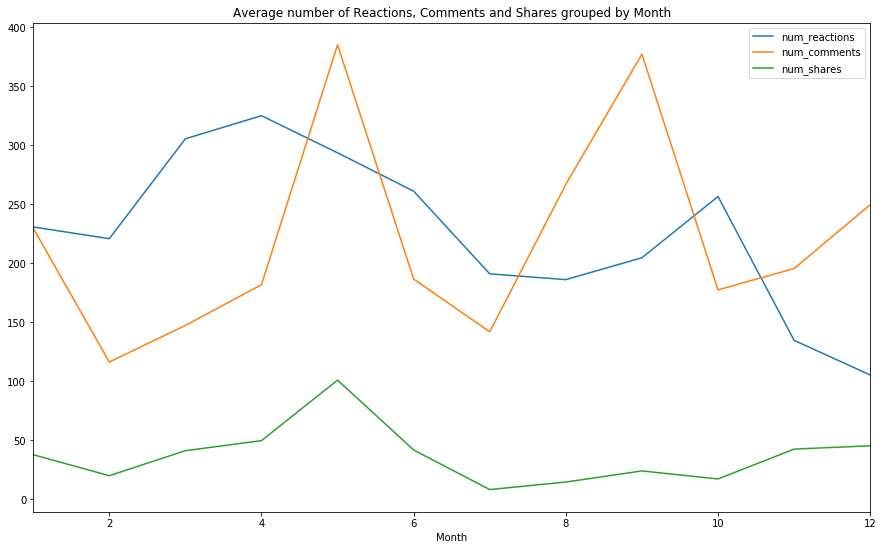

In [25]:
new_df.groupby("Month").mean().plot(y=["num_reactions","num_comments","num_shares"]);
plt.title("Average number of Reactions, Comments and Shares grouped by Month");

From the graphs above, one can observe that the number of shares stay fairly similar during the year, hovering around 50 per post. On the other hand, the number of comments and the number of reacions vary to a much larger extent. The number of comments Seems to spike in May and September, while the number of reactions seems to decrease from the spring to the end of the year with an exception in october. 

In [26]:
# Number of reactions on photos during different month of the year

glm_poisson1 = sm.GLM(new_df["num_reactions"], new_df["Month"], family=sm.families.Poisson())
res = glm_poisson1.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:          num_reactions   No. Observations:                 6999
Model:                            GLM   Df Residuals:                     6998
Model Family:                 Poisson   Df Model:                            0
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -4.7687e+06
Date:                Wed, 28 Aug 2019   Deviance:                   9.4964e+06
Time:                        11:31:43   Pearson chi2:                 2.25e+08
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Month          0.5194   9.92e-05   5235.237      0.0

Considering the fact that our response variable ("num_reactions"), is a categorical variable, the GLM model will help to model this problem. Better to say, to see if during different months of the year we have different number of reactions or not, we use the GLM model and the conclusions show that the mean number of reactions differ during the year since the p-value is zero.

In [27]:
glm_poisson2 = sm.GLM(new_df["num_comments"], new_df["Month"], family=sm.families.Poisson())
res = glm_poisson2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           num_comments   No. Observations:                 6999
Model:                            GLM   Df Residuals:                     6998
Model Family:                 Poisson   Df Model:                            0
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -5.6299e+06
Date:                Wed, 28 Aug 2019   Deviance:                   1.1236e+07
Time:                        11:31:43   Pearson chi2:                 4.30e+08
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Month          0.5351   9.08e-05   5892.691      0.0

The same as previous model, since the "num_comments" is a categorical variable we used the GLM model. The conclusions show that the mean number of comments also differ during months of the year.

In [28]:
glm_poisson3 = sm.GLM(new_df["num_shares"], new_df["Month"], family=sm.families.Poisson())
res = glm_poisson3.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             num_shares   No. Observations:                 6999
Model:                            GLM   Df Residuals:                     6998
Model Family:                 Poisson   Df Model:                            0
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -8.5621e+05
Date:                Wed, 28 Aug 2019   Deviance:                   1.6989e+06
Time:                        11:31:43   Pearson chi2:                 2.24e+07
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Month          0.3701      0.000   1618.289      0.0

The conclusions show that the mean number of shares also differ during months of the year.

Text(0.5, 1.0, 'Average number of Reactions, Comments and Shares grouped by which hour of the day')

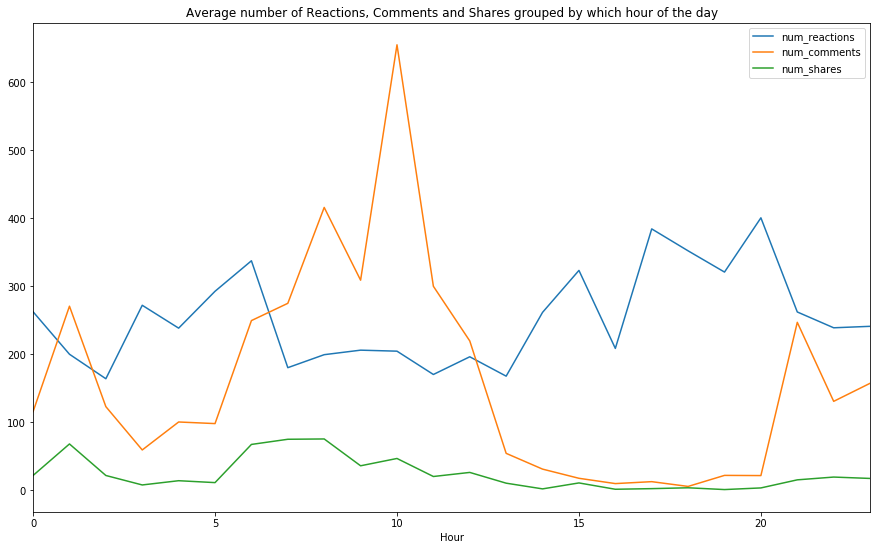

In [29]:
new_df.groupby("Hour").mean().plot(y=["num_reactions","num_comments","num_shares"]);
plt.title("Average number of Reactions, Comments and Shares grouped by which hour of the day")

The plot above displays the mean number of reactions, comments and shares during the day, where 0 is at midnight. Here one can see that the number of comments spikes for posts posted at 10 AM. The number of shares seems to be farily even and does not seem to vary based on when the post was posted. The number of reactions varies a bit more than the number of shares, but doesnt still doesnt vary as much as the number of comments based on when the post was posted.

In [30]:
glm_poisson4 = sm.GLM(new_df["num_reactions"], new_df["Hour"], family=sm.families.Poisson())
res = glm_poisson4.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:          num_reactions   No. Observations:                 6999
Model:                            GLM   Df Residuals:                     6998
Model Family:                 Poisson   Df Model:                            0
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -5.6992e+06
Date:                Wed, 28 Aug 2019   Deviance:                   1.1357e+07
Time:                        11:31:44   Pearson chi2:                 5.12e+08
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Hour           0.2808   5.99e-05   4691.656      0.0

In [31]:
glm_poisson5 = sm.GLM(new_df["num_comments"], new_df["Hour"], family=sm.families.Poisson())
res = glm_poisson5.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           num_comments   No. Observations:                 6999
Model:                            GLM   Df Residuals:                     6998
Model Family:                 Poisson   Df Model:                            0
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -7.5436e+06
Date:                Wed, 28 Aug 2019   Deviance:                   1.5063e+07
Time:                        11:31:44   Pearson chi2:                 1.03e+09
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Hour           0.2800   6.04e-05   4634.765      0.0

In [32]:
glm_poisson6 = sm.GLM(new_df["num_reactions"], new_df["Hour"], family=sm.families.Poisson())
res = glm_poisson6.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:          num_reactions   No. Observations:                 6999
Model:                            GLM   Df Residuals:                     6998
Model Family:                 Poisson   Df Model:                            0
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -5.6992e+06
Date:                Wed, 28 Aug 2019   Deviance:                   1.1357e+07
Time:                        11:31:44   Pearson chi2:                 5.12e+08
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Hour           0.2808   5.99e-05   4691.656      0.0

The conclusion shows that we have different number of reactions, comments and shares during different hours of the day.

Text(0.5, 1.0, 'Average number of Reactions, Comments and Shares grouped by which day of the week')

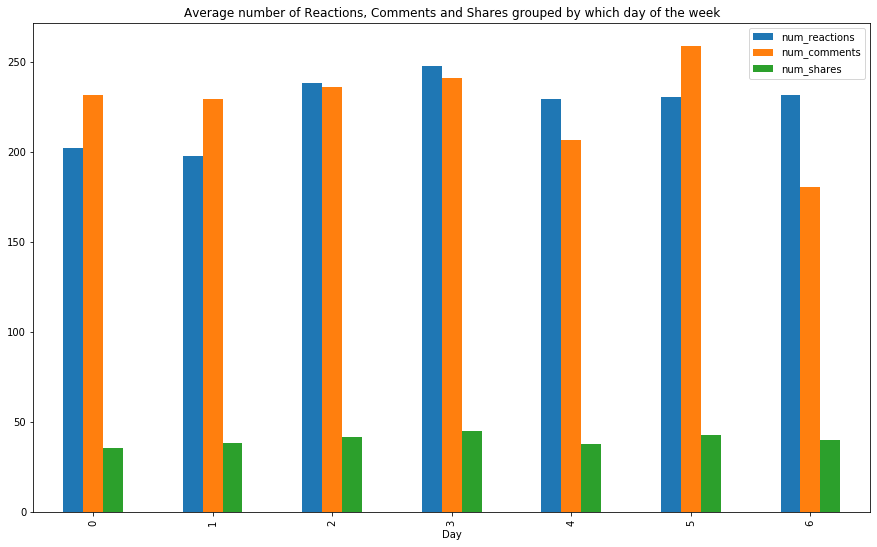

In [33]:
new_df.groupby("Day").mean().plot(kind='bar',y=["num_reactions","num_comments","num_shares"]);
plt.title("Average number of Reactions, Comments and Shares grouped by which day of the week")


### 0 is Monday and 6 is Sunday throughtout the analyses carried out by grouping days.
We can observe that the number of comments peak on Saturdays whereas the numer of reactions is highest on Thursdays. The number of shares remains fairly same throughtout the week.

In [34]:
glm_poisson7 = sm.GLM(new_df["num_reactions"], new_df["Day"], family=sm.families.Poisson())
res = glm_poisson7.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:          num_reactions   No. Observations:                 6999
Model:                            GLM   Df Residuals:                     6998
Model Family:                 Poisson   Df Model:                            0
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -4.3911e+06
Date:                Wed, 28 Aug 2019   Deviance:                   8.7412e+06
Time:                        11:31:45   Pearson chi2:                 3.33e+08
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Day            1.0566      0.000   5546.569      0.0

In [35]:
glm_poisson8 = sm.GLM(new_df["num_comments"], new_df["Day"], family=sm.families.Poisson())
res = glm_poisson8.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           num_comments   No. Observations:                 6999
Model:                            GLM   Df Residuals:                     6998
Model Family:                 Poisson   Df Model:                            0
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -6.4526e+06
Date:                Wed, 28 Aug 2019   Deviance:                   1.2882e+07
Time:                        11:31:45   Pearson chi2:                 1.48e+09
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Day            1.0466      0.000   5339.315      0.0

In [36]:
glm_poisson9 = sm.GLM(new_df["num_shares"], new_df["Day"], family=sm.families.Poisson())
res = glm_poisson9.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             num_shares   No. Observations:                 6999
Model:                            GLM   Df Residuals:                     6998
Model Family:                 Poisson   Df Model:                            0
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -8.6312e+05
Date:                Wed, 28 Aug 2019   Deviance:                   1.7128e+06
Time:                        11:31:45   Pearson chi2:                 3.08e+07
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Day            0.7443      0.000   1615.674      0.0

The conclusion shows that we have different number of reactions, comments and shares during different days of the week.

## 3. Comparative analysis sorted by photo and video

In [37]:
sorted_by_photo = new_df[new_df["status_type"]=="photo"]
sorted_by_photo.head(5)

,status_type,num_reactions,num_comments,num_shares,Year,Month,Day,Hour
1,photo,150,0,0,2018,4,5,22
3,photo,111,0,0,2018,4,5,2
4,photo,213,0,0,2018,4,2,3
5,photo,217,6,0,2018,4,2,2
8,photo,203,1,0,2018,4,1,3


In [38]:
sorted_by_video = new_df[new_df["status_type"]=="video"]
sorted_by_video.head(5)


,status_type,num_reactions,num_comments,num_shares,Year,Month,Day,Hour
0,video,529,512,262,2018,4,6,6
2,video,227,236,57,2018,4,5,6
6,video,503,614,72,2018,4,2,0
7,video,295,453,53,2018,4,1,7
15,video,332,100,30,2018,4,6,5


Text(0.5, 1.0, 'The average number of reactions, comments and shares in photos grouped by Year')

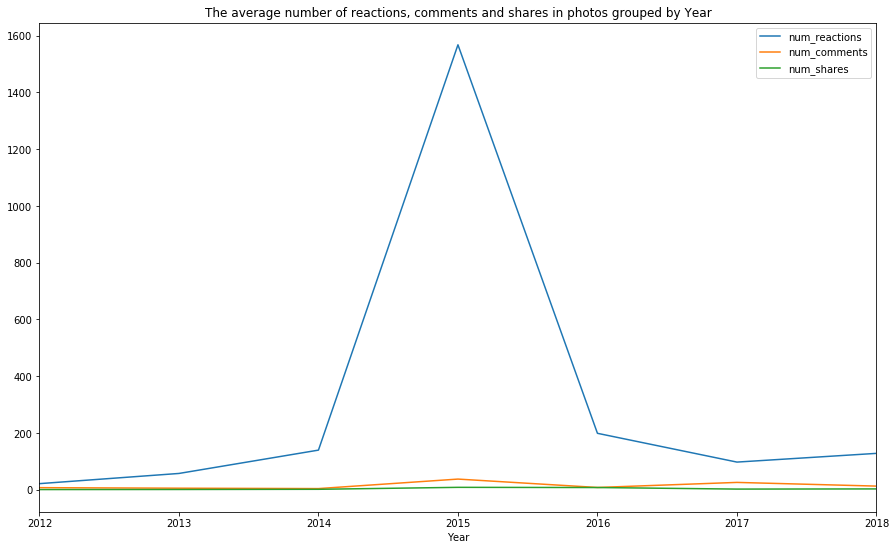

In [39]:
sorted_by_photo.groupby('Year').mean().plot(y= ["num_reactions","num_comments","num_shares"]);
plt.title ("The average number of reactions, comments and shares in photos grouped by Year")

Text(0.5, 1.0, 'The average number of reactions, comments and shares in videos grouped by Year')

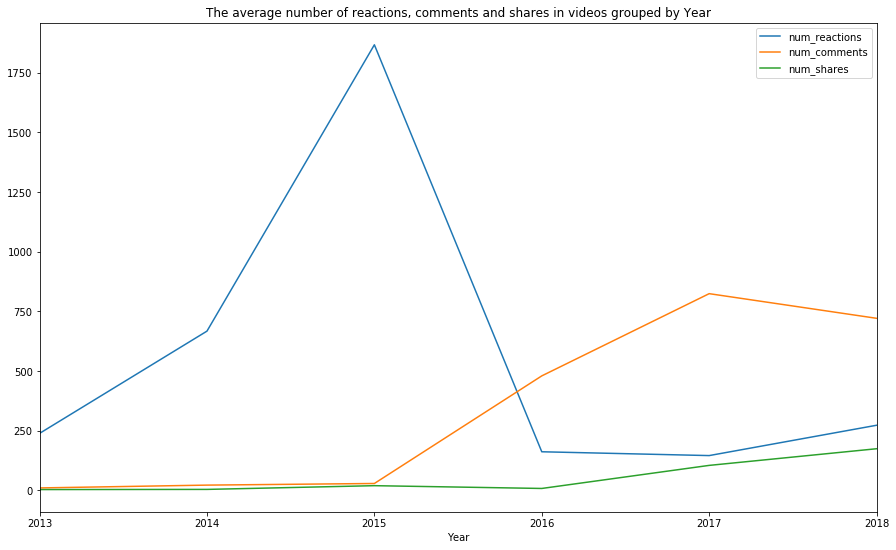

In [40]:
sorted_by_video.groupby('Year').mean().plot(y= ["num_reactions","num_comments","num_shares"]);
plt.title ("The average number of reactions, comments and shares in videos grouped by Year")

The reactions and comments are almost double if the content is video. The shares are also high for video content throughtout the years.

Text(0.5, 1.0, 'The average number of reactions, comments and shares in photos grouped by Month')

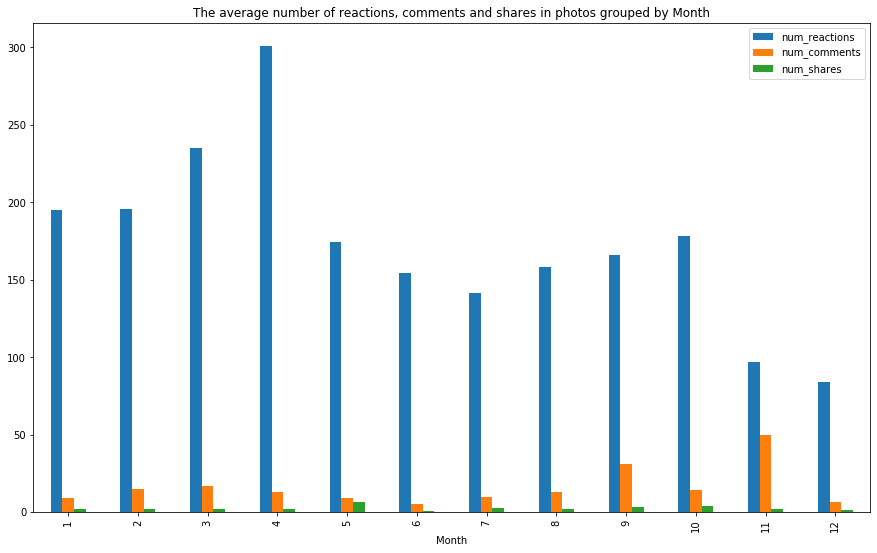

In [41]:
sorted_by_photo.groupby('Month').mean().plot(kind='bar',y= ["num_reactions","num_comments","num_shares"]);
plt.title ("The average number of reactions, comments and shares in photos grouped by Month")

Text(0.5, 1.0, 'The average number of reactions, comments and shares in videos grouped by Month')

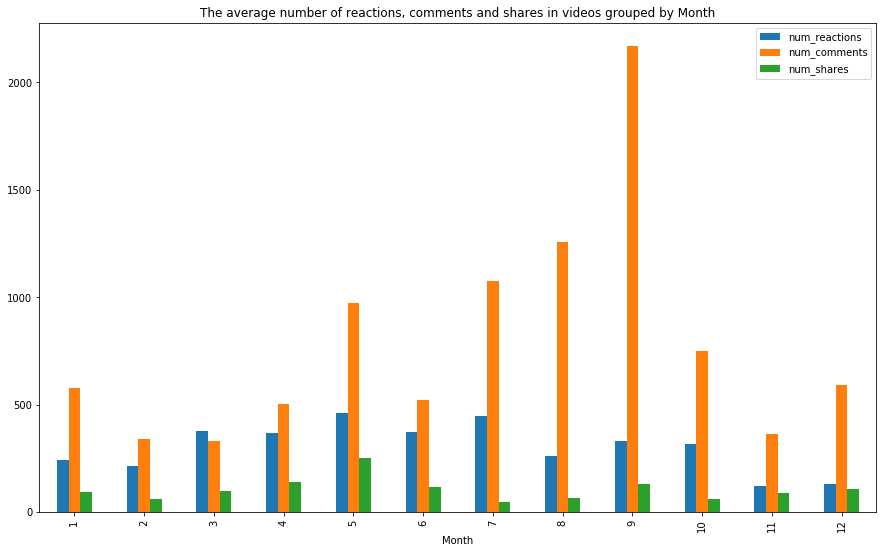

In [42]:
sorted_by_video.groupby('Month').mean().plot(kind='bar',y= ["num_reactions","num_comments","num_shares"]);
plt.title ("The average number of reactions, comments and shares in videos grouped by Month")


The video contents tend to have high number of comments peaking at September whereas the photo contents receive maximum number of reactions peaking at around 300 reactions per photo in the month of April.

Text(0.5, 1.0, 'The average number of reactions, comments and shares in photos grouped by Day')

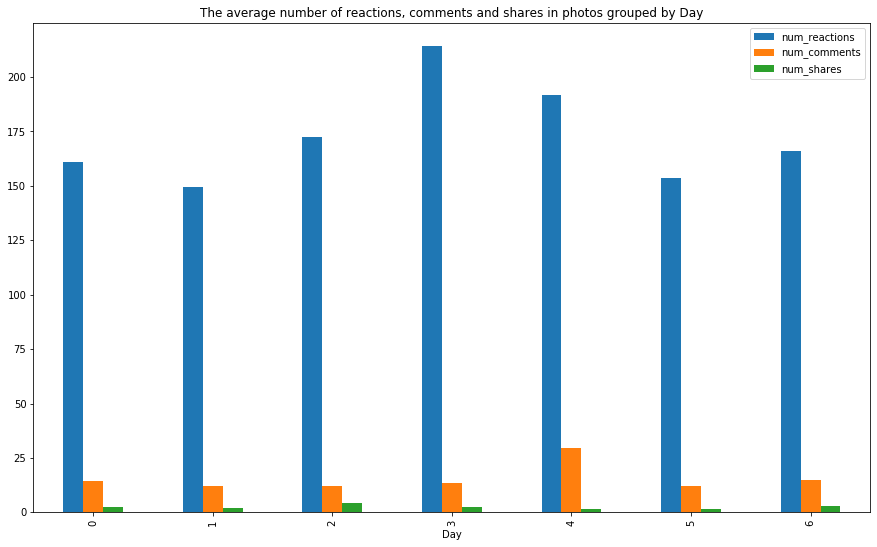

In [43]:
sorted_by_photo.groupby('Day').mean().plot(kind='bar',y= ["num_reactions","num_comments","num_shares"]);
plt.title ("The average number of reactions, comments and shares in photos grouped by Day")

Text(0.5, 1.0, 'The average number of reactions, comments and shares in videos grouped by Day')

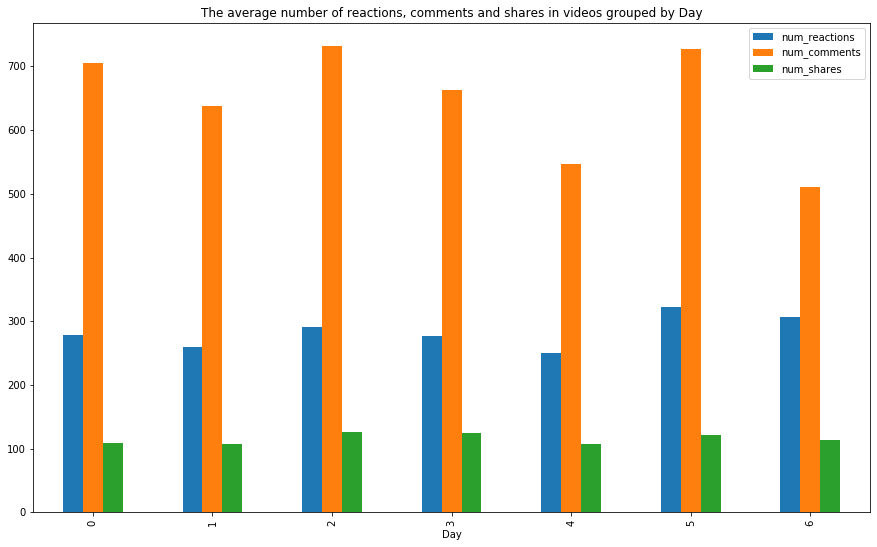

In [44]:
sorted_by_video.groupby('Day').mean().plot(kind='bar',y= ["num_reactions","num_comments","num_shares"]);
plt.title ("The average number of reactions, comments and shares in videos grouped by Day")

Thursdays see the maximum of average reactions in photos whereas in videos, the number of comments peak in Tuesdays and Fridays. 

Text(0.5, 1.0, 'The average number of reactions, comments and shares in photos grouped by Hour')

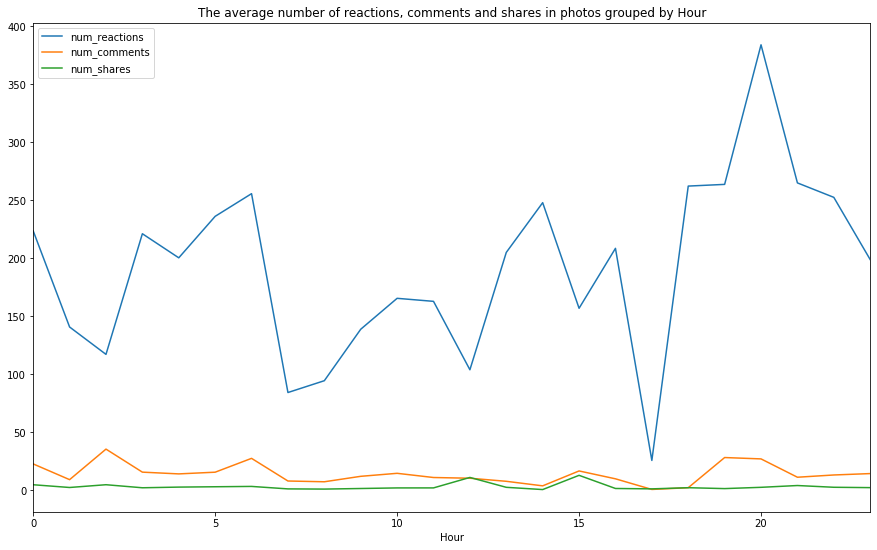

In [45]:
sorted_by_photo.groupby('Hour').mean().plot(y= ["num_reactions","num_comments","num_shares"]);
plt.title ("The average number of reactions, comments and shares in photos grouped by Hour")

Text(0.5, 1.0, 'The average number of reactions, comments and shares in videos grouped by Hour')

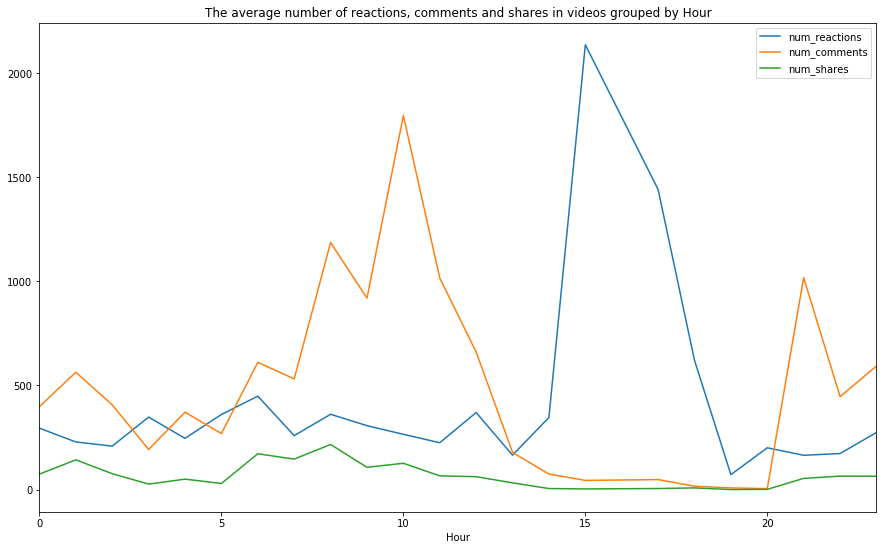

In [46]:
sorted_by_video.groupby('Hour').mean().plot(y= ["num_reactions","num_comments","num_shares"]);
plt.title ("The average number of reactions, comments and shares in videos grouped by Hour")

In photos, the average number of reactions is maximum at 8pm whereas other features are fairly similar throughtout the hours in a day. In case of videos, the comments spike on 10 in the morning and has the tendency to decrease until 8 in the evening,following a slight increase after that. The number of reactions has a wavy pattern until 12 in the afternoon, but reaches a maximum of about 2100 at 3 in the afternoon.

In [47]:
#Analysis of the usage of likes Vs Other form of reactions after 2015 separately in photos and videos

In [48]:
#Facebook live started in August 2015, for analysis purpose we split the data to before and after the year 2016
before2016=df[df['Year']<=2015]
after2016=df[df['Year']>2015]


In [49]:
after2016.loc[:, "sum_of_reactions"] = after2016.num_angrys + after2016.num_loves + after2016.num_wows + after2016.num_hahas

In [50]:
likes_vs_reactions=after2016.drop(["num_reactions","num_comments","num_shares","num_loves","num_wows","num_hahas","num_sads","num_angrys","status_published"],axis=1)
likes_vs_reactions.head(5)

,status_type,num_likes,Year,Month,Day,Hour,sum_of_reactions
0,video,432,2018,4,6,6,96
1,photo,150,2018,4,5,22,0
2,video,204,2018,4,5,6,23
3,photo,111,2018,4,5,2,0
4,photo,204,2018,4,2,3,9


Text(0.5, 1.0, ' Sum of the number of likes and reactions used in photos fom 2016 to 2018 ')

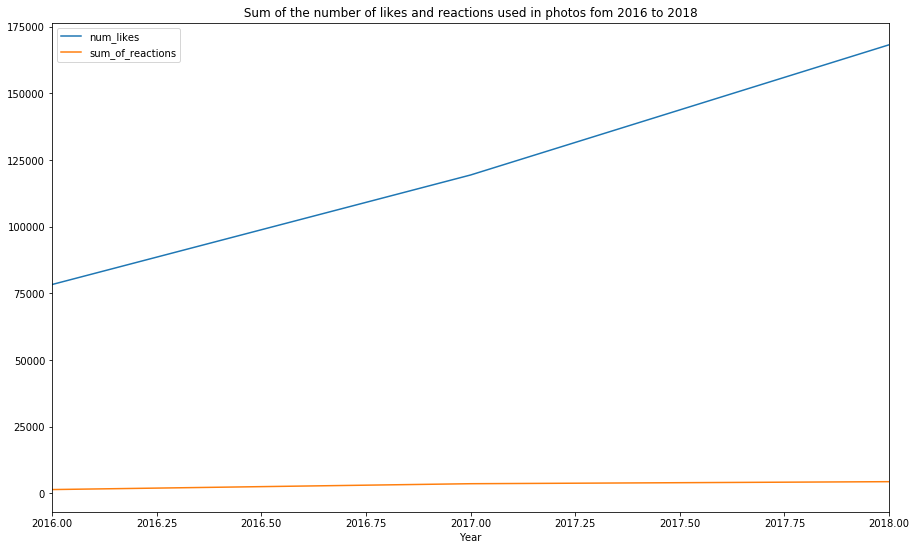

In [51]:
 likes_vs_reactions[likes_vs_reactions["status_type"]=="photo"].groupby("Year").sum().plot(y= ["num_likes","sum_of_reactions"]);
plt.title(" Sum of the number of likes and reactions used in photos fom 2016 to 2018 ")

Text(0.5, 1.0, ' Sum of the number of likes and reactions used in videos fom 2016 to 2018 ')

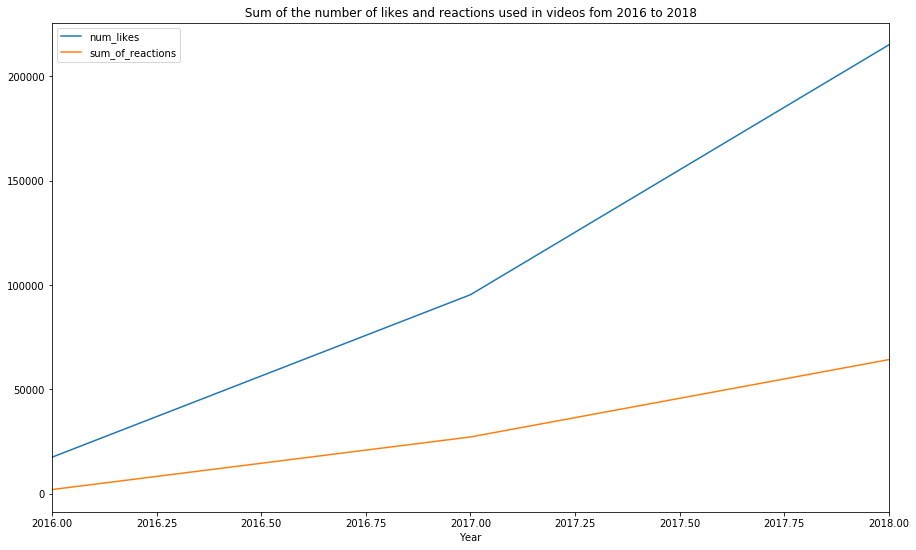

In [52]:
likes_vs_reactions[likes_vs_reactions["status_type"]=="video"].groupby("Year").sum().plot(y= ["num_likes","sum_of_reactions"]);
plt.title(" Sum of the number of likes and reactions used in videos fom 2016 to 2018 ")

From the above plots, we can observe that the introduction of reactions(love,haha,sad,angry) hasn't declined the usage of likes in photos or video contents. While, we can see Thai's use reactions mostly in videos and the trend is increasing but still is very low compared to the usage of likes.

# Conclusion
 



Overall Trend: To reach maximum audience the posts must be posted on Thursdays or Saturdays at 10am. The number of shares and the number of reactions have a very high correlation. 

Photos Trend: To reach maximum audience photo contents must be posted on Thursdays at 8pm.

Videos Trend: To reach maximum audience the video contents must be posted on Tuesdays or Fridays at 3pm. 

The comments and shares are almost double if the content is video whereas the reactions are much higher in photos than in the videos.

The usage of likes is still very high as compared to the usage of reactions. 

